# 5-7 线性回归的梯度下降

### 公式推导
线性回归的数学模型如下：
$$
\begin{align}
h_{\theta}(x) &= \theta_0 + \theta_1x \\
J(\theta) &= \frac{1}{2m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})^2}
\end{align}
$$
梯度下降算法迭代公式如下：
$$
\theta_j:=\theta_j-\alpha\frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1)
$$
要想运用上述梯度下降法的迭代公式，关键在于求出代价函数的导数，即：
$$
\frac{\partial}{\partial \theta_j}J(\theta_0, \theta_1) = \frac{\partial}{\partial \theta_j}\frac{1}{2m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})^2}
$$
分别对 $\theta_0$ 和 $\theta_1$ 求偏导可以得到：
$$
\begin{align}
\frac{\partial}{\partial \theta_0}J(\theta_0, \theta_1) 
&= \frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})} \\
\frac{\partial}{\partial \theta_1}J(\theta_0, \theta_1) 
&= \frac{1}{m}\sum_{i=1}^{m}{((h_{\theta}(x^{(i)})-y^{(i)}) \cdot x^{(i)})}
\end{align}
$$
梯度下降迭代公式可以改写为：
$$
\begin{align}
\theta_0 &:= \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})} \\
\theta_1 &:= \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}{((h_{\theta}(x^{(i)})-y^{(i)}) \cdot x^{(i)})}
\end{align}
$$

### 批量梯度下降法的概念

上述梯度下降法的每一步中都用到了所有的训练样本，因此称这种梯度下降法为批量梯度下降法。

### Python 实现线性回归的梯度下降

#### 初始化训练样本数据和参数

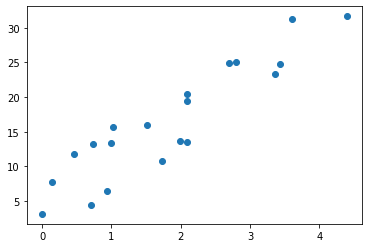

In [26]:
import numpy as np
import matplotlib.pyplot as plt

m = 20                    # 样本个数
theta = np.zeros((2, 1))  # 初始值 (0,0)
alpha = 0.01              # 学习率
iters = 1000              # 最大迭代次数
np.random.seed(1)         # 设置一个随机数种子使得每次运行生成的样本相同
# 随机生成包含m个样本的数据集
x = np.random.uniform(0, 5, m).reshape(m, 1)
y = 6*x + np.random.uniform(0, 10, m).reshape(m, 1)
# 为了直观感受生成的训练样本数据，下面将其绘制出来
plt.scatter(x, y)
plt.show()
# 可以看到随机生成的点大致分布在一条直线的附近

#### 实现1：不考虑矩阵运算优化，直接利用上述迭代公式进行计算
$$
\begin{align}
\theta_0 &:= \theta_0 - \alpha\frac{1}{m}\sum_{i=1}^{m}{(h_{\theta}(x^{(i)})-y^{(i)})} \\
\theta_1 &:= \theta_1 - \alpha\frac{1}{m}\sum_{i=1}^{m}{((h_{\theta}(x^{(i)})-y^{(i)}) \cdot x^{(i)})}
\end{align}
$$

theta0 = [5.02840588]
theta1 = [6.23956169]


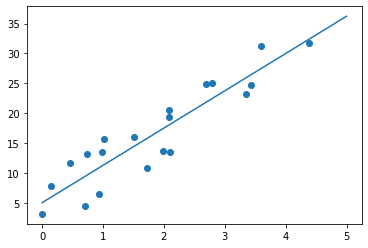

In [18]:
def grad_desc_normal(x, y, m, theta, alpha, iters):
    """普通的线性回归梯度下降
    m: 样本数
    theta: 初始值
    alpha: 步长
    iters: 最大迭代次数
    """
    theta_copy = theta.copy() # 拷贝一份，避免改变传入的参数
    
    for _i in range(iters):
        grad0 = 0
        grad1 = 0
        # 计算迭代公式中sum的部分
        for i in range(m):
            # 求 xi 点的预测值 h(xi)
            h = theta_copy[0] + theta_copy[1] * x[i]
            grad0 +=  h - y[i]
            grad1 += (h - y[i]) * x[i]
        # 更新 theta 的值
        theta_copy[0] -= alpha * (1/m) * grad0
        theta_copy[1] -= alpha * (1/m) * grad1
        
    return theta_copy

best_theta = grad_desc_normal(x, y, m, theta, alpha, iters)
print('theta0 =', best_theta[0])
print('theta1 =', best_theta[1])
plt.scatter(x, y)
x1 = [0, 5]
y1 = [best_theta[0], best_theta[0]+5*best_theta[1]]
plt.plot(x1, y1)
plt.show()

#### 实现2：不考虑矩阵运算进行优化

显然 grad_desc_normal 中运用了过多的 for 循环，计算效率并不高，尤其是在数据集较大时计算过程将非常耗费时间，因此我们考虑用向量化编程的方法优化该计算过程。

首先考虑直线方程，如果 $X = [x_0, x_1]$（其中 $x_0^{(i)}$ 恒为1）则直线方程可以写为
$$
X\theta = [x_0, x_1][\theta_0,\theta_1]^T
$$
此时代价函数可以写为：
$$
J(\theta) = \frac{1}{2m}(X\theta-Y)^T(X\theta-Y)
$$
对代价函数求梯度：
$$
\nabla J(\theta) = \frac{1}{m}X^T(X\theta-Y)
$$
求梯度这里用到了一个矩阵求导公式：
$$
\frac{\partial}{\partial X}X^TX = 2X
$$
有了上述公式，梯度下降的迭代公式可以写为：
$$
\theta := \theta - \alpha \frac{1}{m}X^T(X\theta-Y)
$$
利用该迭代公式重新实现线性回归的梯度下降

theta0 = [5.02840588]
theta1 = [6.23956169]


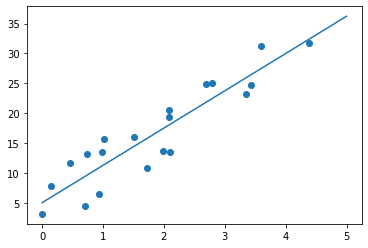

In [28]:
def grad_desc_better(x, y, m, theta, alpha, iters):
    """向量化编程实现的线性回归梯度下降
    m: 样本数
    theta: 初始值
    alpha: 步长
    iters: 最大迭代次数
    """
    theta_copy = theta.copy()             # 拷贝一份，避免改变传入的参数
    x = np.hstack((np.ones(x.shape), x))  # 补一列 1 构成 X
    for _i in range(iters):
        diff = np.dot(x, theta_copy) - y
        grad = (1/m) * np.dot(x.T, diff)        # 梯度
        theta_copy = theta_copy - alpha * grad  # 更新 theta 的值
    return theta_copy

best_theta = grad_desc_better(x, y, m, theta, alpha, iters)
print('theta0 =', best_theta[0])
print('theta1 =', best_theta[1])
plt.scatter(x, y)
x1 = [0, 5]
y1 = [best_theta[0], best_theta[0]+5*best_theta[1]]
plt.plot(x1, y1)
plt.show()

### 总结
虽然用不用向量化编程结果似乎都一样，但是二者在运算速度上差异是非常大的，下面进行一个简单的耗时对比

In [29]:
%timeit best_theta = grad_desc_normal(x, y, m, theta, alpha, iters)
%timeit best_theta = grad_desc_better(x, y, m, theta, alpha, iters)

125 ms ± 1.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
5.44 ms ± 152 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


可以看到，普通的线性回归梯度下降耗时125ms而优化后耗时仅为5毫秒，二者的差距是非常大的，因此向量化编程是非常有必要的。